In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline
# doubled the males data set
# df = pd.read_csv("./data-labled/songs-gender-lable-balanced.csv")
# df = df.drop(["Year"], axis=1)
# df = df[df['dominant_gender'] != "neutral"]
# df = df.dropna()
df = pd.read_csv('./data-labled/songs-femal-male-lable.csv')
print(df.head())

   Unnamed: 0                                             Lyrics  Year  \
0           0  sam the sham miscellaneous wooly bully wooly b...  1965   
1          10   trailer for sale or rent rooms to let fifty c...  1965   
2          11  let me tell ya bout the birds and the bees and...  1965   
3          12   hold me hold me never let me go until youve t...  1965   
4          13  i said Ì¢shotgun shoot em for he runs now do t...  1965   

  dominant_gender  
0          female  
1            male  
2          female  
3          female  
4            male  


In [11]:
# transverting categories into numerical data

df['category_id'] = df['dominant_gender'].factorize()[0]
category_id_df = df[['dominant_gender', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'dominant_gender']].values)

print(df.head(3))

   Unnamed: 0                                             Lyrics  Year  \
0           0  sam the sham miscellaneous wooly bully wooly b...  1965   
1          10   trailer for sale or rent rooms to let fifty c...  1965   
2          11  let me tell ya bout the birds and the bees and...  1965   

  dominant_gender  category_id  
0          female            0  
1            male            1  
2          female            0  


In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',  lowercase=True, ngram_range=(3, 4), stop_words='english')
features = tfidf.fit_transform(df.Lyrics.values.astype('U')).toarray()
labels = df.category_id
features.shape

#find the terms which are most correlated by each gender
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for dominant_gender, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(dominant_gender))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  print("\n")

# 'female':
  . Most correlated unigrams:
. 
  . Most correlated bigrams:
. 


# 'male':
  . Most correlated unigrams:
. 
  . Most correlated bigrams:
. 




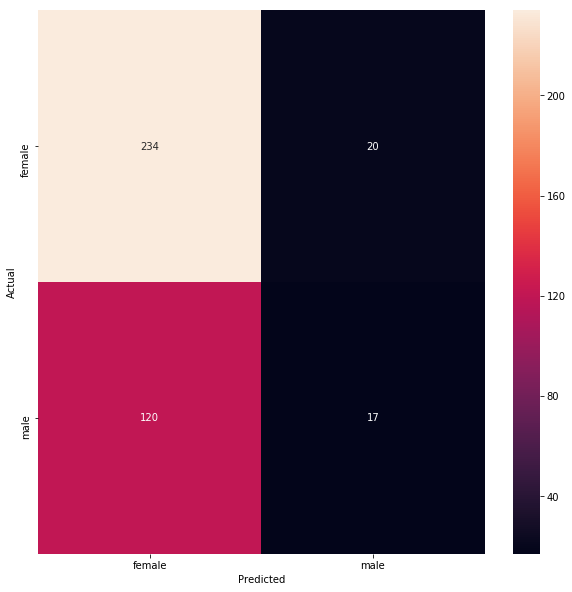

In [23]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.21, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.dominant_gender.values, yticklabels=category_id_df.dominant_gender.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# y_pred = tfidf.tranform("this is an example")
# model.predict(y_pred)

In [24]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['dominant_gender', 'Lyrics']])
      print('')

'male' predicted as 'female' : 120 examples.


,dominant_gender,Lyrics
1199,male,as i walk through the valley of the shadow of ...
1408,male,i cant stand to fly im not that naive im just...
731,male,well were living here in allentown and theyre...
1374,male,i know when hes been on your mind that distan...
233,male,i have heard all about love land and all of it...
390,male,when are you gonna come down when are you goi...
616,male,thereve been times in my life ive been wonder...
473,male,ridin round town with all the windows down ei...
853,male,clock strikes upon the hour and the sun begin...
1834,male,i dont like the way hes looking at you im sta...



'female' predicted as 'male' : 20 examples.


,dominant_gender,Lyrics
1838,female,intro yayo yayo mulala yayoverse 1 bitch bette...
303,female,my mama told me she said son please beware the...
991,female,woke up to the sound of pouring rain the wind...
1573,female,closer closer closer closerturn the lights of...
1188,female,wish id told her how i felt then maybe shed be...
1122,female,could you be the most beautiful girl in the w...
254,female,each day through my window i watch her as she ...
893,female,i run a comb through my hair and step out in ...
1751,female,its our party we can do what we want no drama...
1237,female,in my life i see where ive been i said that i...


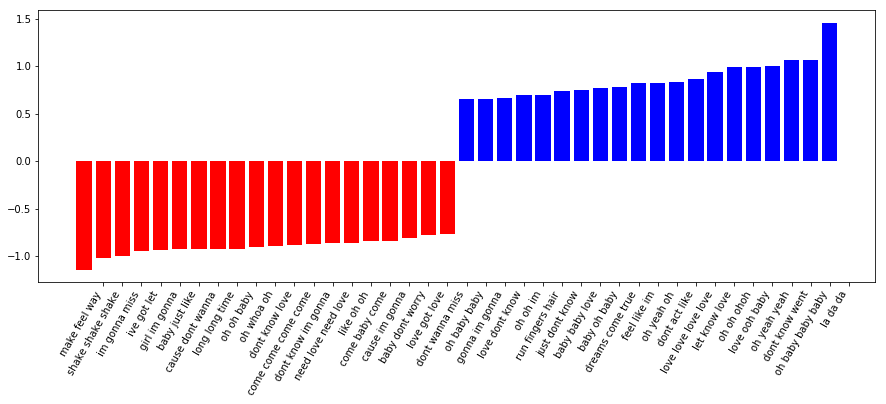

In [25]:

def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

plot_coefficients(model, tfidf.get_feature_names())


In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['dominant_gender'].unique()))

             precision    recall  f1-score   support

     female       0.66      0.92      0.77       254
       male       0.46      0.12      0.20       137

avg / total       0.59      0.64      0.57       391



In [27]:
with open("model.pkl","wb") as fout:
    pickle.dump(model,fout)
    
with open("tfidf.pkl","wb") as fout:
    pickle.dump(tfidf,fout)